# aSPEM Experiment : analysis




In [1]:
%run 0_parameters.ipynb


WELCOME

2020-02-03T16:52:10+01:00

CPython 3.5.2
IPython 5.3.0

numpy 1.16.3
matplotlib 3.0.3
torch 1.1.0

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.4.0-83-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit
host name  : INV-OPE-HP01
Git hash   : 0d7f43e6eb58503ac7a2f8eab51e99053bb2f039
Git repo   : https://github.com/chloepasturel/AnticipatorySPEM.git
Git branch : master


/home/drone/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/home/drone/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


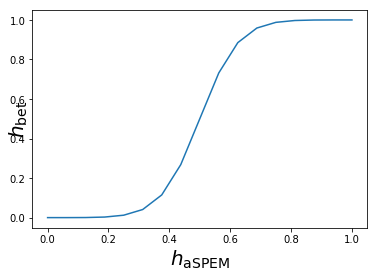

In [2]:
p = np.linspace(0, 1, 17)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def logit(p):
    return np.log(p / (1 - p))
    
fig, ax = plt.subplots()

ax.set_xlabel(r'$h_{\mathrm{aSPEM}}$', fontsize=20) ; 
ax.set_ylabel(r'$h_{\mathrm{bet}}$', labelpad=-20, fontsize=20)
    
ax.plot(p, sigmoid(4.*logit(p)))

In [3]:
if not os.path.exists('figures/Result'):
    os.makedirs('figures/Result')

In [4]:
msfigpath = '../PasturelMontagniniPerrinet2019/figures'
observer = None #'AM'
mode = 'pari'

from aSPEM import Analysis
e = Analysis(observer=observer, mode=mode, name_file_fit='fct_velocity_sigmo')

In [5]:
t_titre_f = t_titre
t_label_f = t_label
fig_width_f = fig_width/2

proba = 'true', 'bcp'

mode_bcp = 'fixed', 'max', 'expectation', 'mean', 'leaky'

result = 'bet', 'acceleration', 'velocity'


color_bcp_mean = 'g'
color_bcp_fix = 'tab:orange'
color_true_p = 'b'

In [6]:
opt = dict(t_titre=t_titre_f, t_label=t_label_f, titre='',
           color_r=[color_true_p, color_bcp_fix, color_bcp_mean], alpha=1)

real :
mean r^2 : 0.49034986323983937 +/- 0.11494619501551495
mean MI : 0.9400985946400798 +/- 0.25505735898019954

leaky :
mean r^2 : 0.5515090997386892 +/- 0.1914670735359745
mean MI : 1.1178437166011033 +/- 0.40929175360168124

mean :
mean r^2 : 0.6701527908749932 +/- 0.14562788357229323
mean MI : 1.3126921676470396 +/- 0.36441827882578837

real leaky
r^2 = WilcoxonResult(statistic=16.0, pvalue=0.07118923429208965)
mi = WilcoxonResult(statistic=12.0, pvalue=0.034170472692229406) 

real mean
r^2 = WilcoxonResult(statistic=0.0, pvalue=0.002217721464237049)
mi = WilcoxonResult(statistic=0.0, pvalue=0.002217721464237049) 

leaky mean
r^2 = WilcoxonResult(statistic=9.0, pvalue=0.018602929901135743)
mi = WilcoxonResult(statistic=11.0, pvalue=0.0280561241492436) 



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


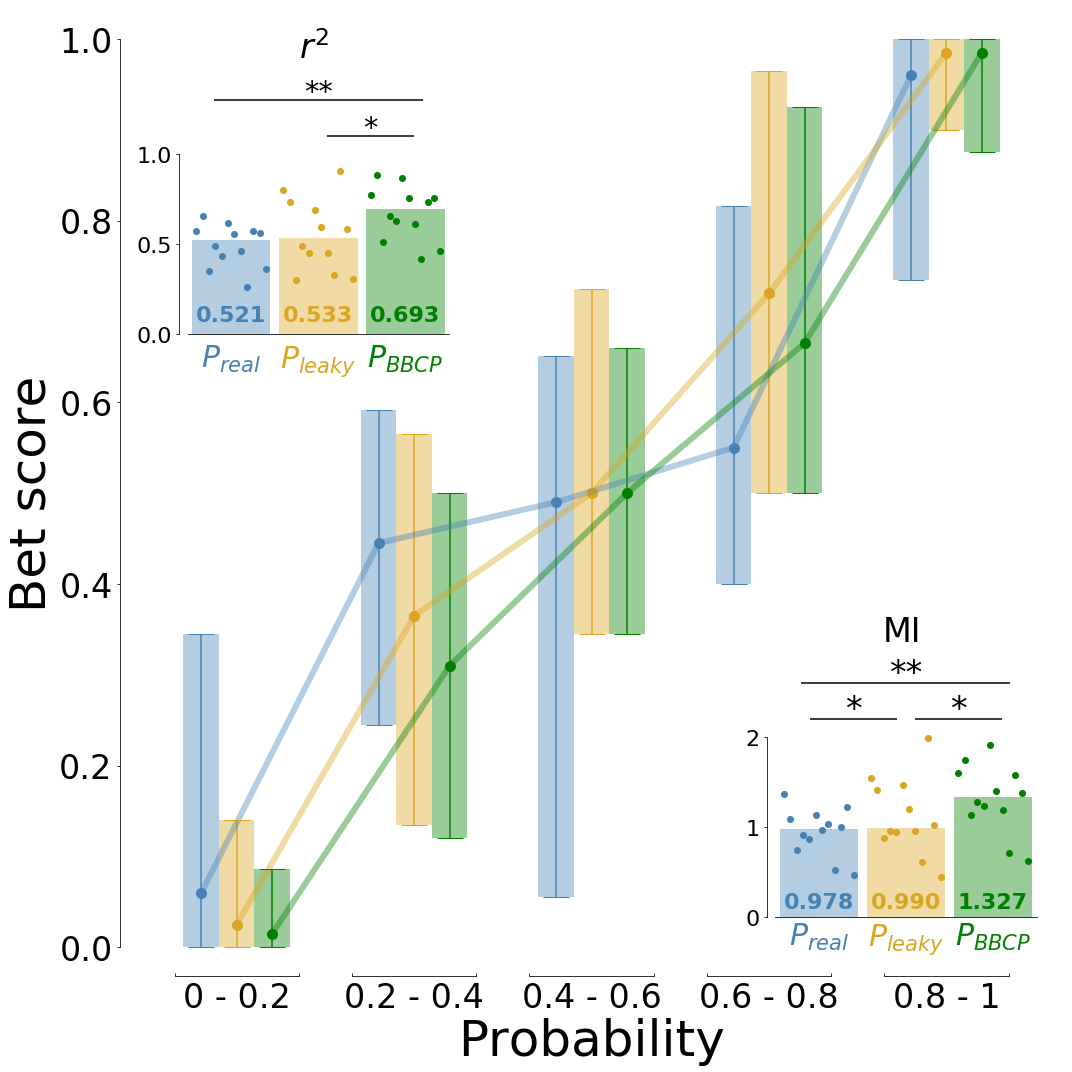

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(fig_width_f, fig_width_f))#,constrained_layout=True)
axs = e.comparison_line(ax=axs, fig=fig, result='bet', offset=0.04, lw_r=3,   **opt)
for ext in exts: fig.savefig('{msfigpath}/4_B_result_psycho_bet'.format(msfigpath=msfigpath) + ext, dpi=dpi)

real :
mean r^2 : 0.3816457120124272 +/- 0.0831109961615173
mean MI : 0.5622221741547854 +/- 0.10792628505105299

leaky :
mean r^2 : 0.3668615211837663 +/- 0.08900377834351264
mean MI : 0.6221265879376084 +/- 0.10254728341683388

mean :
mean r^2 : 0.4598798013026306 +/- 0.10467498211898504
mean MI : 0.7079482646555189 +/- 0.13419759067142

real leaky
r^2 = WilcoxonResult(statistic=25.0, pvalue=0.272095182736126)
mi = WilcoxonResult(statistic=5.0, pvalue=0.00764908205529392) 

real mean
r^2 = WilcoxonResult(statistic=0.0, pvalue=0.002217721464237049)
mi = WilcoxonResult(statistic=0.0, pvalue=0.002217721464237049) 

leaky mean
r^2 = WilcoxonResult(statistic=1.0, pvalue=0.0028734139278525227)
mi = WilcoxonResult(statistic=3.0, pvalue=0.004741768038406972) 



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


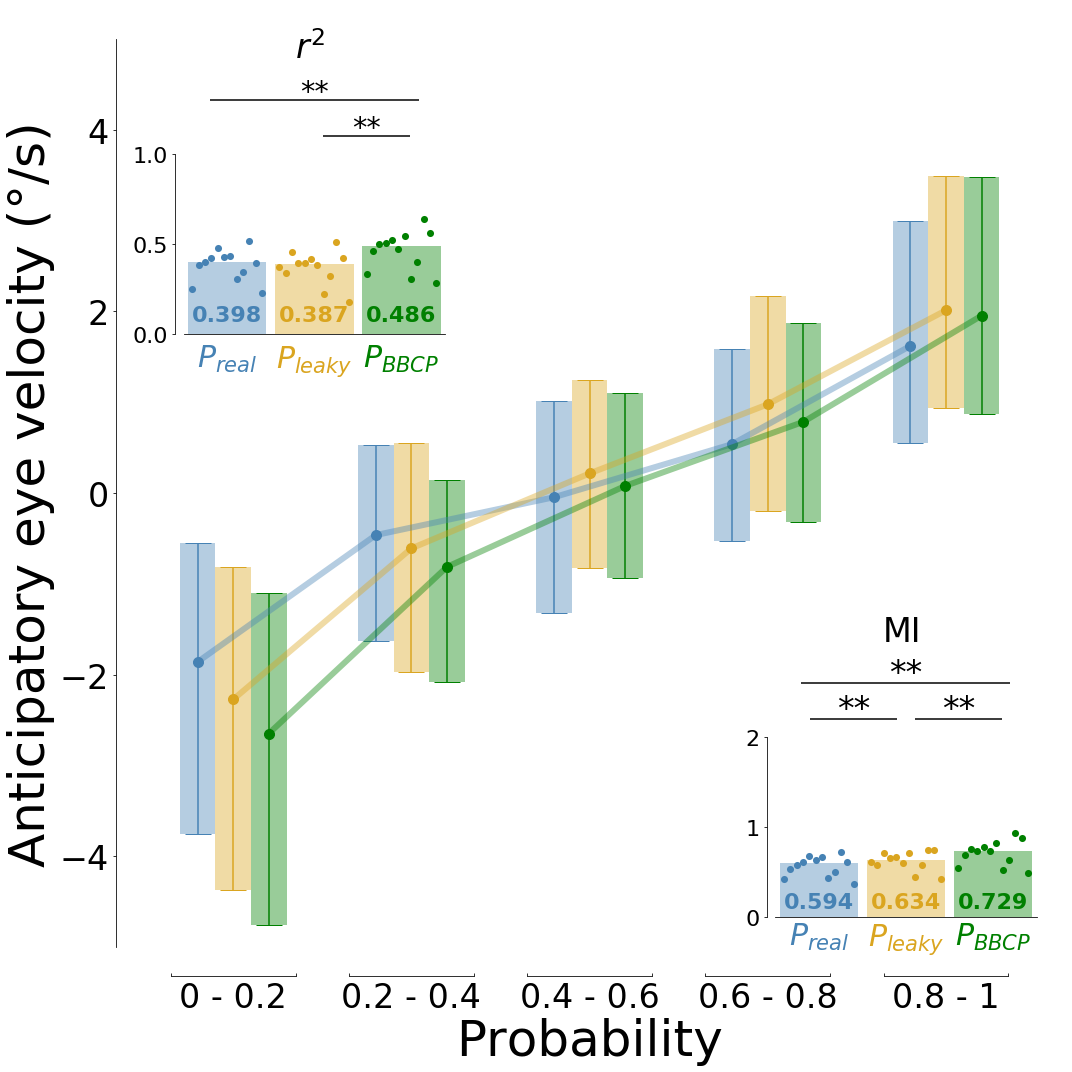

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(fig_width_f, fig_width_f))#,constrained_layout=True)
axs = e.comparison_line(ax=axs, fig=fig, result='velocity', offset=0.04, lw_r=3, **opt)
for ext in exts: fig.savefig('{msfigpath}/4_A_result_psycho_aSPEM'.format(msfigpath=msfigpath) + ext, dpi=dpi)

### without pause

real :
mean r^2 : 0.49034986323983937 +/- 0.11494619501551495
mean MI : 0.9400985946400798 +/- 0.25505735898019954

leaky :
mean r^2 : 0.4259155089657704 +/- 0.1586013595385184
mean MI : 0.9666170423792467 +/- 0.3008160820517699

mean :
mean r^2 : 0.6525323666687721 +/- 0.1421178142147302
mean MI : 1.2557933725955661 +/- 0.34983736788271114

real leaky
r^2 = WilcoxonResult(statistic=16.0, pvalue=0.07118923429208965)
mi = WilcoxonResult(statistic=30.0, pvalue=0.480176889906077) 

real mean
r^2 = WilcoxonResult(statistic=0.0, pvalue=0.002217721464237049)
mi = WilcoxonResult(statistic=0.0, pvalue=0.002217721464237049) 

leaky mean
r^2 = WilcoxonResult(statistic=1.0, pvalue=0.0028734139278525227)
mi = WilcoxonResult(statistic=0.0, pvalue=0.002217721464237049) 



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


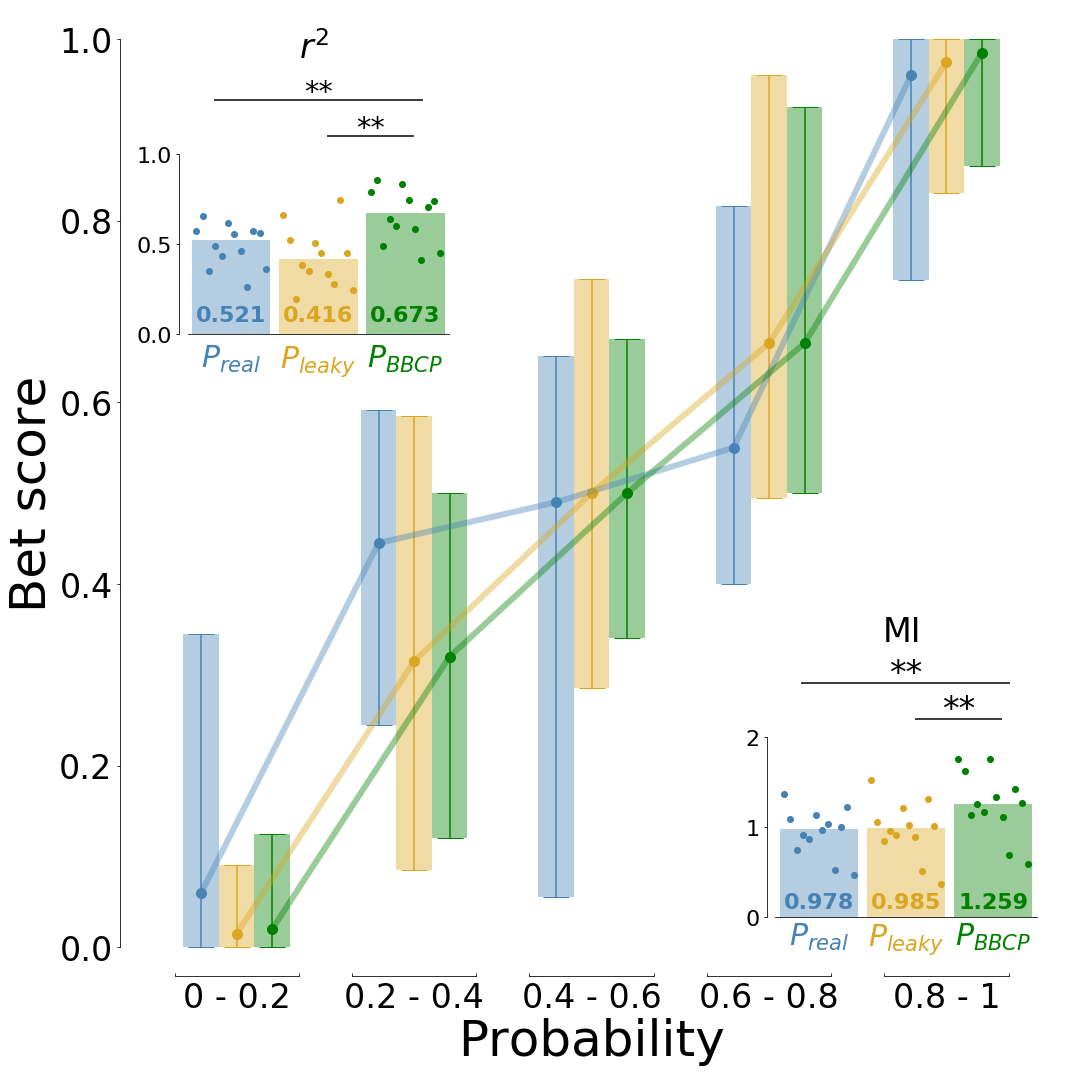

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(fig_width_f, fig_width_f))#,constrained_layout=True)
axs = e.comparison_line(ax=axs, fig=fig, result='bet', offset=0.04, lw_r=3, pause=False,  **opt)

real :
mean r^2 : 0.3816457120124272 +/- 0.0831109961615173
mean MI : 0.5622221741547854 +/- 0.10792628505105299

leaky :
mean r^2 : 0.30597000151943343 +/- 0.07787937486706685
mean MI : 0.5777247401518514 +/- 0.09612469755078588

mean :
mean r^2 : 0.45212171644050064 +/- 0.10190780498313887
mean MI : 0.7123041237807923 +/- 0.12506403044256426

real leaky
r^2 = WilcoxonResult(statistic=10.0, pvalue=0.022909099354356588)
mi = WilcoxonResult(statistic=37.0, pvalue=0.875329249147922) 

real mean
r^2 = WilcoxonResult(statistic=1.0, pvalue=0.0028734139278525227)
mi = WilcoxonResult(statistic=0.0, pvalue=0.002217721464237049) 

leaky mean
r^2 = WilcoxonResult(statistic=1.0, pvalue=0.0028734139278525227)
mi = WilcoxonResult(statistic=2.0, pvalue=0.0037017494066892425) 



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


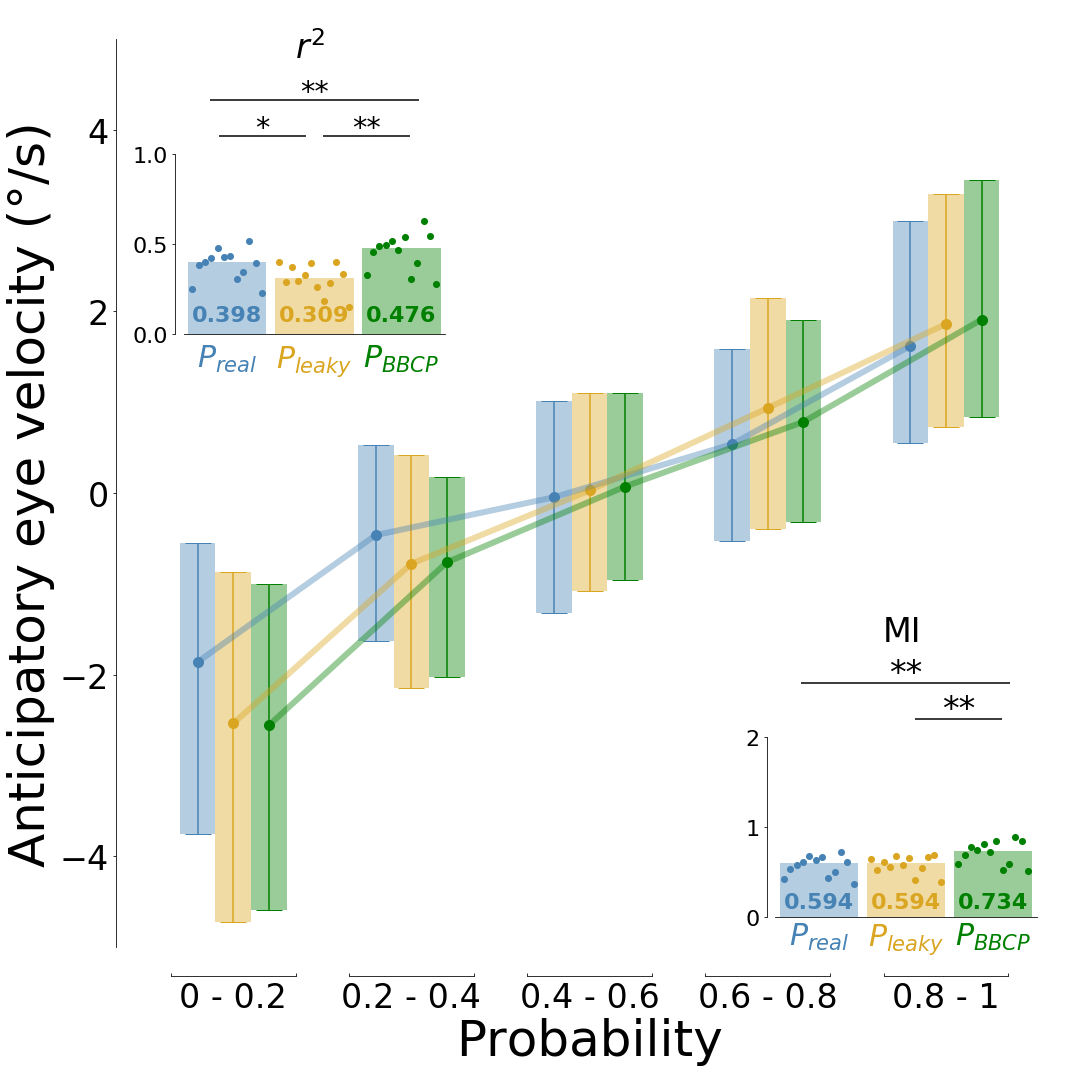

In [10]:
fig, axs = plt.subplots(1, 1, figsize=(fig_width_f, fig_width_f))#,constrained_layout=True)
axs = e.comparison_line(ax=axs, fig=fig, result='velocity', offset=0.04, lw_r=3, pause=False,  **opt)

## representative subjects

In [11]:
N_trials = 200
num_block = [0]
#sujet = [0,1,2,3,4,5,6,7, 8,9, 10, 11]
sujet = []#10, 6]
figname = '2_results_enregistrement'

In [12]:
t_label_f = t_label
fig_width_f = fig_width

In [13]:
color=[['k', 'k'], [color_true_p, color_true_p], ['k','none']]
alpha = [[.35,.15],[.0,.0],[1,0]]
opt = dict(sujet=sujet, num_block=num_block, 
           color=color,alpha=alpha, titre='', t_label=t_label_f, lw=2,
           color_bet='dimgrey', color_va='k', fig_width=fig_width_f)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


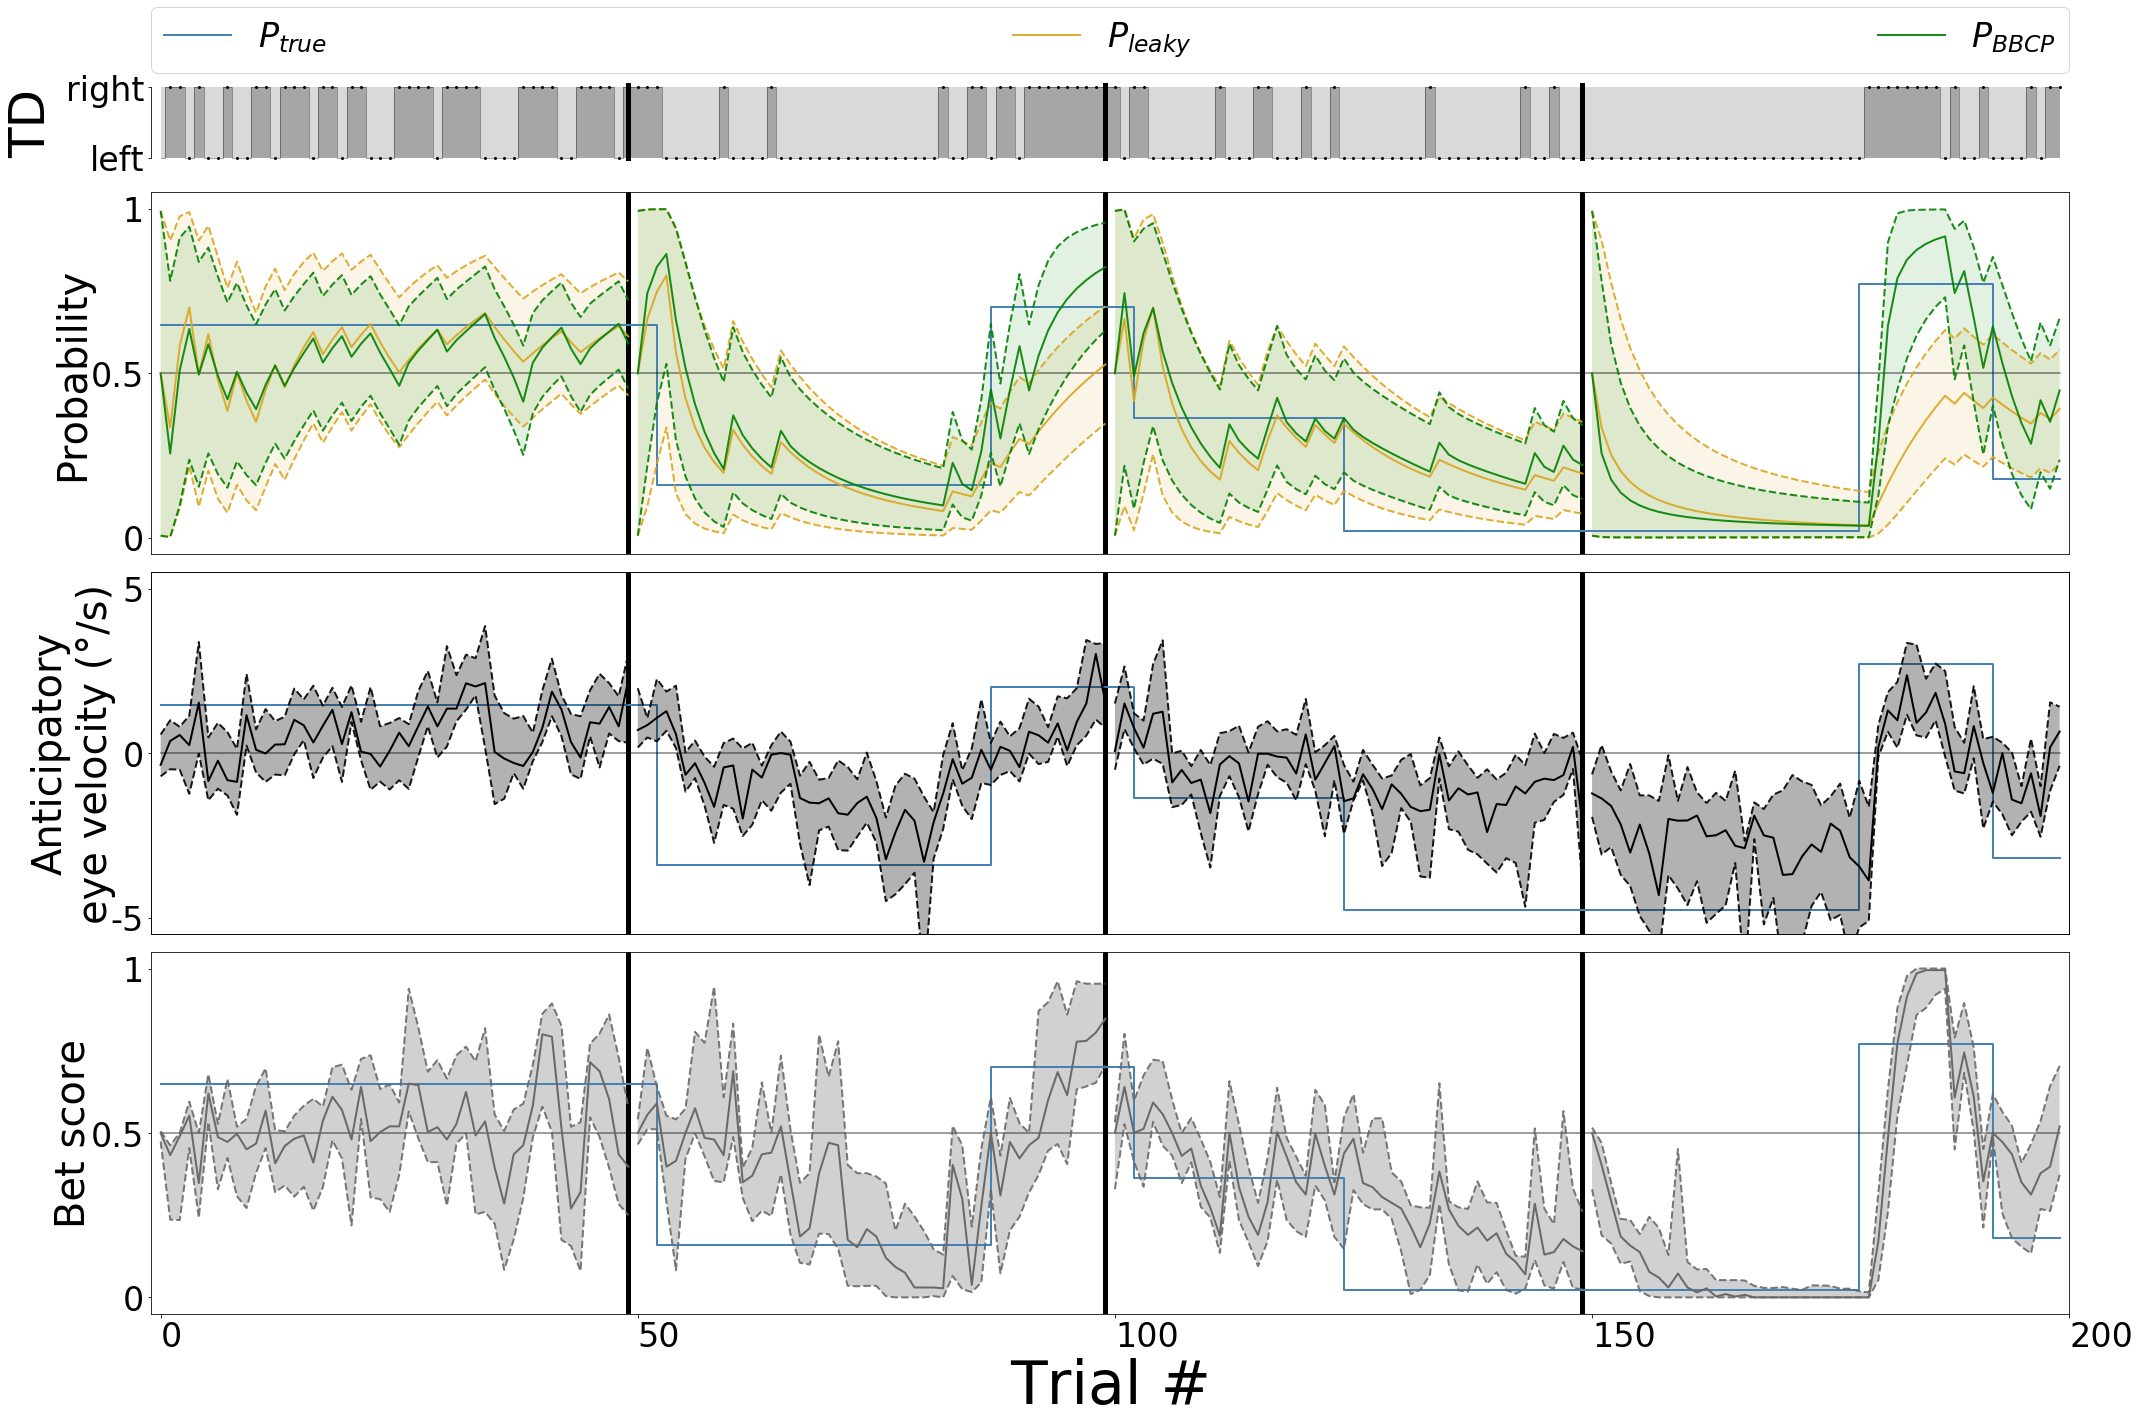

In [14]:
fig, axs = e.plot_experiment(mode_bcp=['leaky', 'mean'], color_bcp=[color_bcp_fix, color_bcp_mean],
                       name_bcp=['$P_{leaky}$', '$P_{BBCP}$'], **opt)
for ext in exts: fig.savefig('{msfigpath}/{figname}'.format(msfigpath=msfigpath, figname=figname) + ext, dpi=400, bbox_inches='tight', pad_inches=0)